In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key



# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

#Weather Url
url = "https://api.openweathermap.org/data/2.5/weather?"



# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_count = len(cities)
city_count

614

In [4]:
#Classifies Units in the dataframe
units = "Imperial"

#Query Url
weather_url = url + "appid=" + weather_api_key + "&units=" + units +"&q="  



#The frame for the dictionary weather_dict
weather_dict = {
    "City": [],
    "Lats": [],
    "Lngs": [],
    "Max Temp": [],
    "Cloudiness": [],
    "Humidity": [],
    "Wind Speed": [],
    "Country": [], 
    "Date": []
}

#Receives all the data in the API and puts in the dictionary
print("Recieving data...")

for i, city in enumerate(cities):
    response = requests.get(weather_url + city)
    
    if response.status_code == 200:
        response = response.json()
        
        print("Processing:", str(i), city)
        weather_dict["City"].append(response['name'])
        weather_dict["Lats"].append(response['coord']['lat'])
        weather_dict["Lngs"].append(response['coord']['lon'])
        weather_dict["Max Temp"].append(response['main']['temp_max'])
        weather_dict["Cloudiness"].append(response['clouds']['all'])
        weather_dict["Humidity"].append(response['main']['humidity'])
        weather_dict["Wind Speed"].append(response['wind']['speed'])
        weather_dict["Country"].append(response['sys']['country'])
        weather_dict["Date"].append(response['dt'])


#Prints this when all the data has been received
print("Data recieved.")

Recieving data...
Processing: 1 eregli
Processing: 2 torbay
Processing: 3 nyrob
Processing: 4 clyde river
Processing: 5 bengkulu
Processing: 6 sao miguel do araguaia
Processing: 7 ushuaia
Processing: 8 pokhvistnevo
Processing: 9 bluff
Processing: 10 orbetello
Processing: 11 mataura
Processing: 12 hermanus
Processing: 13 mar del plata
Processing: 15 yichun
Processing: 16 albany
Processing: 17 chuy
Processing: 18 manokwari
Processing: 19 atuona
Processing: 20 guozhen
Processing: 21 codrington
Processing: 22 rapid valley
Processing: 23 busselton
Processing: 24 diamantino
Processing: 25 vaini
Processing: 26 iqaluit
Processing: 27 indramayu
Processing: 28 hithadhoo
Processing: 29 cidreira
Processing: 30 northam
Processing: 31 opuwo
Processing: 32 rikitea
Processing: 33 adrar
Processing: 34 georgetown
Processing: 35 new norfolk
Processing: 36 jamestown
Processing: 37 eureka
Processing: 38 kapaa
Processing: 39 saquarema
Processing: 40 cururupu
Processing: 41 saint-augustin
Processing: 42 gran

Processing: 357 nagato
Processing: 358 bonavista
Processing: 359 taoudenni
Processing: 360 high level
Processing: 361 menongue
Processing: 362 butajira
Processing: 363 casper
Processing: 364 sisimiut
Processing: 365 chinsali
Processing: 366 san juan
Processing: 367 ancud
Processing: 368 fort nelson
Processing: 369 moose factory
Processing: 370 imbituba
Processing: 371 nalut
Processing: 372 cermik
Processing: 373 puerto escondido
Processing: 377 san carlos
Processing: 378 leh
Processing: 379 asfi
Processing: 380 klaksvik
Processing: 381 bambous virieux
Processing: 382 verkhoyansk
Processing: 383 mitsamiouli
Processing: 384 manyana
Processing: 385 pacific grove
Processing: 386 kungurtug
Processing: 387 serov
Processing: 389 laguna
Processing: 390 olafsvik
Processing: 391 tabou
Processing: 392 pong
Processing: 393 carballo
Processing: 394 lorengau
Processing: 395 kieta
Processing: 396 san rafael
Processing: 397 kirovskiy
Processing: 398 keti bandar
Processing: 399 talnakh
Processing: 400 

In [5]:
#The completed dictionary
weather_dict

{'City': ['Heraclea',
  'Torbay',
  'Nyrob',
  'Clyde River',
  'Bengkulu',
  'São Miguel do Araguaia',
  'Ushuaia',
  'Pokhvistnevo',
  'Bluff',
  'Orbetello',
  'Mataura',
  'Hermanus',
  'Mar del Plata',
  'Yichun',
  'Albany',
  'Chui',
  'Manokwari',
  'Atuona',
  'Guozhen',
  'Codrington',
  'Rapid Valley',
  'Busselton',
  'Diamantino',
  'Vaini',
  'Iqaluit',
  'Indramayu',
  'Hithadhoo',
  'Cidreira',
  'Northam',
  'Opuwo',
  'Rikitea',
  'Adrar',
  'George Town',
  'New Norfolk',
  'Jamestown',
  'Eureka',
  'Kapaa',
  'Saquarema',
  'Cururupu',
  'Saint-Augustin',
  'Grand Gaube',
  'Kenai',
  'Kidal',
  'Port Lincoln',
  'Barrow',
  'Kyzyl-Suu',
  'Basco',
  'Aracataca',
  'Arraial do Cabo',
  'Provideniya',
  'Padang',
  'Nome',
  'Bredasdorp',
  'Leningradskiy',
  'Vestmannaeyjar',
  'Zhigansk',
  'Port Alfred',
  'Verāval',
  'Karratha',
  'Scarborough',
  'Santa Maria',
  'Tautira',
  'Hobart',
  'Hasaki',
  'Yellowknife',
  'Hilo',
  'Lüderitz',
  'Deshnok',
  'Corren

In [6]:
#Transforms the dictionary into a dataframe
weather_data_df = pd.DataFrame(weather_dict)
weather_data_df

,City,Lats,Lngs,Max Temp,Cloudiness,Humidity,Wind Speed,Country,Date
0,Heraclea,37.5133,34.0467,80.31,2,40,3.47,TR,1659643832
1,Torbay,47.6666,-52.7314,77.76,100,79,4.00,CA,1659643534
2,Nyrob,60.7330,56.7202,64.44,62,74,2.48,RU,1659643833
3,Clyde River,70.4692,-68.5914,42.03,100,83,5.14,CA,1659643834
4,Bengkulu,-3.8004,102.2655,73.85,97,90,2.98,ID,1659643834
...,...,...,...,...,...,...,...,...,...
560,Tazovsky,67.4667,78.7000,58.21,100,64,10.38,RU,1659644115
561,Buenos Aires,-34.6132,-58.3772,53.98,0,61,4.61,AR,1659644116
562,Nabire,-3.3667,135.4833,75.51,95,92,2.53,ID,1659644116
563,Pareora,-44.4871,171.2132,45.18,100,76,8.21,NZ,1659644117


In [7]:
#Creates summary stats for each variable
weather_data_df.describe()

,Lats,Lngs,Max Temp,Cloudiness,Humidity,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,19.849238,17.044791,71.136938,53.755752,69.608850,7.918053,1.659644e+09
std,33.147703,91.338693,13.915383,40.993216,20.744159,5.160176,1.016319e+02
min,-54.800000,-179.166700,36.280000,0.000000,11.000000,0.000000,1.659644e+09
25%,-6.836700,-63.283300,60.530000,7.000000,58.000000,4.000000,1.659644e+09
50%,23.599600,20.225100,73.600000,60.000000,74.000000,6.910000,1.659644e+09
75%,47.700000,100.861700,80.650000,99.000000,85.000000,10.830000,1.659644e+09
max,78.218600,179.316700,102.000000,100.000000,100.000000,28.740000,1.659644e+09


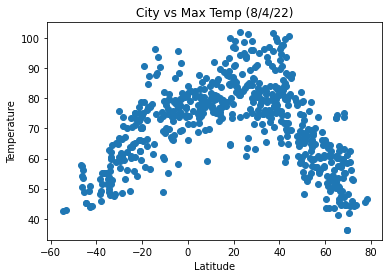

Here we can see a relationship between the latitude of a city and its maximum temperature. We see as we reach towards extreme latitude the temperature decreases.


In [9]:
#Plots City location against the maximum temperature in each city via scatterplot
x_values = weather_data_df['Lats']
y_values = weather_data_df['Max Temp']
plt.scatter(x_values,y_values)
plt.title('City vs Max Temp (8/4/22)')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig("output_data/Fig1.png")
plt.show()
print("Here we can see a relationship between the latitude of a city and its maximum temperature. We see as we reach towards extreme latitude the temperature decreases.")

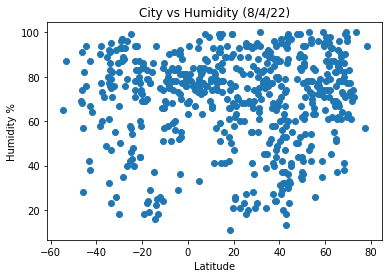

Here we can see a relationship between the latitude of a city and its humidity. We see a majority humidity percentages above 50%.


In [10]:
#Plots City location against the humidity percentage in each city via scatterplot
x_values = weather_data_df['Lats']
y_values = weather_data_df['Humidity']
plt.scatter(x_values,y_values)
plt.title('City vs Humidity (8/4/22)')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.savefig("output_data/Fig2.png")
plt.show()
print("Here we can see a relationship between the latitude of a city and its humidity. We see a majority humidity percentages above 50%.")

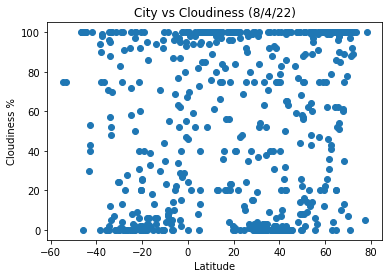

Here we can see a relationship between the latitude of a city and its humidity. We see a majority cities have cloudiness at 0 or 100 percent.


In [11]:
#Plots City location against the cloudiness percentage in each city via scatterplot
x_values = weather_data_df['Lats']
y_values = weather_data_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.title('City vs Cloudiness (8/4/22)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.savefig("output_data/Fig3.png")
plt.show()
print("Here we can see a relationship between the latitude of a city and its humidity. We see a majority cities have cloudiness at 0 or 100 percent.")

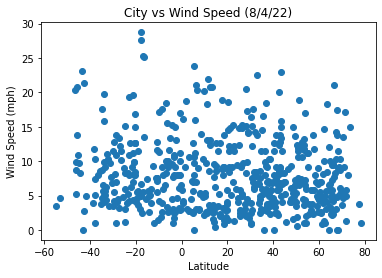

Here we can see a relationship between the latitude of a city and its humidity. We see a majority of wind speeds are below 20 mph.


In [12]:
#Plots City location against the wind speed in each city via scatterplot
x_values = weather_data_df['Lats']
y_values = weather_data_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.title('City vs Wind Speed (8/4/22)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("output_data/Fig4.png")
plt.show()
print("Here we can see a relationship between the latitude of a city and its humidity. We see a majority of wind speeds are below 20 mph.")

In [13]:
#Dataframe for the Southern Hemisphere
weather_data_south_df = weather_data_df.loc[weather_data_df['Lats'] < 0]
weather_data_south_df

,City,Lats,Lngs,Max Temp,Cloudiness,Humidity,Wind Speed,Country,Date
4,Bengkulu,-3.8004,102.2655,73.85,97,90,2.98,ID,1659643834
5,São Miguel do Araguaia,-13.2750,-50.1628,93.63,0,18,3.94,BR,1659643835
6,Ushuaia,-54.8000,-68.3000,42.46,75,65,3.44,AR,1659643762
8,Bluff,-46.6000,168.3333,57.79,100,69,20.29,NZ,1659643836
10,Mataura,-46.1927,168.8643,57.47,100,91,5.17,NZ,1659643837
...,...,...,...,...,...,...,...,...,...
556,Luganville,-15.5333,167.1667,78.26,18,82,4.52,VU,1659644113
557,Ahipara,-35.1667,173.1667,51.49,0,89,3.76,NZ,1659644113
561,Buenos Aires,-34.6132,-58.3772,53.98,0,61,4.61,AR,1659644116
562,Nabire,-3.3667,135.4833,75.51,95,92,2.53,ID,1659644116


In [14]:
#Dataframe for the northen hemisphere
weather_data_north_df = weather_data_df.loc[weather_data_df['Lats'] > -0.0001]
weather_data_north_df

,City,Lats,Lngs,Max Temp,Cloudiness,Humidity,Wind Speed,Country,Date
0,Heraclea,37.5133,34.0467,80.31,2,40,3.47,TR,1659643832
1,Torbay,47.6666,-52.7314,77.76,100,79,4.00,CA,1659643534
2,Nyrob,60.7330,56.7202,64.44,62,74,2.48,RU,1659643833
3,Clyde River,70.4692,-68.5914,42.03,100,83,5.14,CA,1659643834
7,Pokhvistnevo,53.6524,52.1274,69.49,64,54,3.56,RU,1659643836
...,...,...,...,...,...,...,...,...,...
554,Wallaceburg,42.5930,-82.3885,85.10,100,73,8.28,CA,1659643834
558,Nāhan,30.5500,77.3000,74.53,98,88,3.85,IN,1659644114
559,Krasnosel'kup,65.7000,82.4667,57.54,62,62,9.37,RU,1659644115
560,Tazovsky,67.4667,78.7000,58.21,100,64,10.38,RU,1659644115


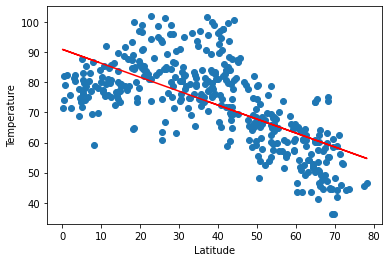

This linear regression demonstrates the trend between cities in the northern hemisphere and the maximum temperature. We notice that as the latitude increases the temperature decreases.


In [15]:
#Creates a scatterplot and calculates the trend line for the Northern Hemisphere: Temperature (F) vs. Latitude
x_values = weather_data_north_df["Lats"]
y_values = weather_data_north_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
fig5 = plt.show()
fig5
print("This linear regression demonstrates the trend between cities in the northern hemisphere and the maximum temperature. We notice that as the latitude increases the temperature decreases.")

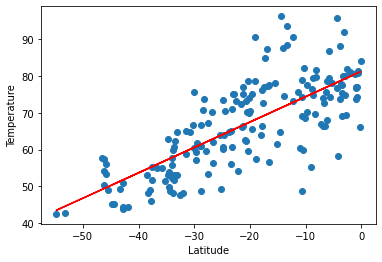

This linear regression demonstrates the trend between cities in the southern hemisphere and the maximum temperature. We notice that as the latitude decreases the temperature decreases.


In [16]:
#Creates a scatterplot and calculates the trend line for the Southern Hemisphere: Temperature (F) vs. Latitude
x_values = weather_data_south_df["Lats"]
y_values = weather_data_south_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
fig6 = plt.show()
fig6
print("This linear regression demonstrates the trend between cities in the southern hemisphere and the maximum temperature. We notice that as the latitude decreases the temperature decreases.")

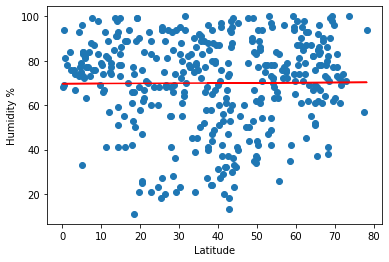

This linear regression demonstrates the trend between cities in the northern hemisphere and humidity percentage. We notice that there is a slight increase in humidity as the latitude increases.


In [17]:
#Creates a scatterplot and calculates the trend line for the Northern Hemisphere: Humidity vs. Latitude
x_values = weather_data_north_df["Lats"]
y_values = weather_data_north_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
fig7 = plt.show()
fig7
print("This linear regression demonstrates the trend between cities in the northern hemisphere and humidity percentage. We notice that there is a slight increase in humidity as the latitude increases.")

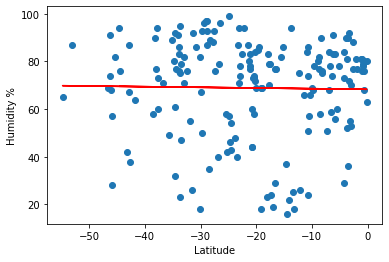

This linear regression demonstrates the trend between cities in the southern hemisphere and humidity percentage. We notice that there is a slight increase in humidity as the latitude decreases.


In [18]:
#Creates a scatterplot and calculates the trend line for the Southern Hemisphere:  Humidity vs. Latitude
x_values = weather_data_south_df["Lats"]
y_values = weather_data_south_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
fig8 = plt.show()
fig8
print("This linear regression demonstrates the trend between cities in the southern hemisphere and humidity percentage. We notice that there is a slight increase in humidity as the latitude decreases.")

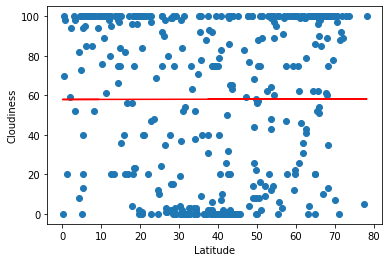

This linear regression demonstrates the trend between cities in the northern hemisphere and cloud coverage. We notice that there is no change in cloudiness as the latitude increases.


In [19]:
#Creates a scatterplot and calculates the trend line for the Northern Hemisphere: Cloudiness % vs. Latitude
x_values = weather_data_north_df["Lats"]
y_values = weather_data_north_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
fig9 = plt.show()
fig9
print("This linear regression demonstrates the trend between cities in the northern hemisphere and cloud coverage. We notice that there is no change in cloudiness as the latitude increases.")

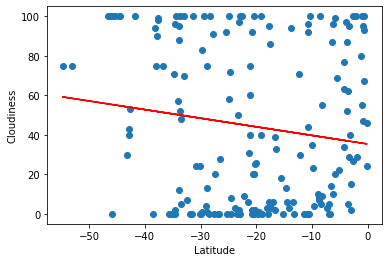

This linear regression demonstrates the trend between cities in the southern hemisphere and cloud coverage. We notice that there is a decrease in cloudiness as the latitude increases.


In [20]:
#Creates a scatterplot and calculates the trend line for the Southern Hemisphere: Cloudiness % vs. Latitude
x_values = weather_data_south_df["Lats"]
y_values = weather_data_south_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
fig10 = plt.show()
fig10
print("This linear regression demonstrates the trend between cities in the southern hemisphere and cloud coverage. We notice that there is a decrease in cloudiness as the latitude increases.")

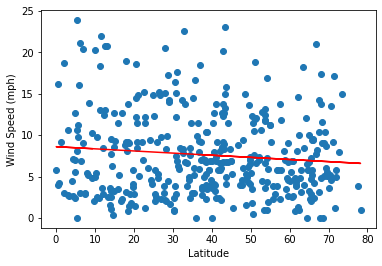

This linear regression demonstrates the trend between cities in the northern hemisphere and wind speed. We notice that there is a slight decrease in wind as the latitude increases.


In [21]:
#Creates a scatterplot and calculates the trend line for the Northern Hemisphere: Wind Speed vs. Latitude
x_values = weather_data_north_df["Lats"]
y_values = weather_data_north_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
fig11 = plt.show()
fig11
print("This linear regression demonstrates the trend between cities in the northern hemisphere and wind speed. We notice that there is a slight decrease in wind as the latitude increases.")

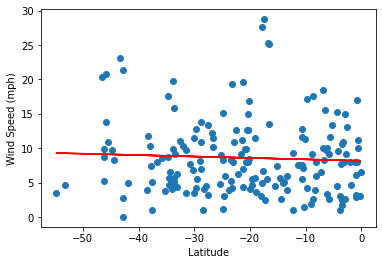

This linear regression demonstrates the trend between cities in the southern hemisphere and wind speed. We notice that there is a slight decrease in wind as the latitude increases.


In [22]:
#Creates a scatterplot and calculates the trend line for the Southern Hemisphere: Wind Speed vs. Latitude
x_values = weather_data_south_df["Lats"]
y_values = weather_data_south_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values *slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
fig12 = plt.show()
fig12
print("This linear regression demonstrates the trend between cities in the southern hemisphere and wind speed. We notice that there is a slight decrease in wind as the latitude increases.")

In [23]:
#Exports the dataframe to a csv file
weather_data_df.to_csv(output_data_file) 